In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 5.3 Handwritten digit classification (Gradient Ascent)

In this problem, you will use logistic regression to classify images of handwritten digits. From the course
web site, download the files train3.txt, test3.txt, train5.txt, and test5.txt. These files
contain data for binary images of handwritten digits. Each image is an 8x8 bitmap represented in the files
by one line of text. Some of the examples are shown in the following figure.

## (a) Training

Perform a logistic regression (using gradient ascent or Newton’s method) on the images in files
train3.txt and train5.txt. Indicate clearly the algorithm used, and provide evidence that
it has converged (or nearly converged) by plotting or printing out the log-likelihood on several iterations
of the algorithm, as well as the percent error rate on the images in these files. Also, print out the
64 elements of your solution for the weight vector as an 8x8 matrix.

In [40]:
def data(xfname0, xfname1):
    '''
    Create data matrix for train or test data
    '''
    x = np.loadtxt(xfname0)
    x = np.concatenate((x, np.loadtxt(xfname1)))
    y = np.array([0,1]) # 3 is 0, 5 is 1
    y = np.repeat(y, int(len(x)/2))
    
    return x, y
    

In [41]:
def sig(z):
    return 1/(1 + np.exp(-z))

In [42]:
def log_likely(x_train, y_train, w):
    '''
    Log-likelihood measurement
    '''
    ll = 0
    for t in range(T):
        ll += y_train[t]*np.log(sig(np.dot(w, x_train[t]))) + (1 - y_train[t])*np.log(sig(np.dot(-w, x_train[t])))
        
    return ll
    

In [43]:
def deriv_ll(x_train, y_train, w):
    '''
    Derivative of log-likelihood (used for gradient ascient)
    
    '''
    dlldw = []    # partial deriv of log-likelihood wrt weights for each feature
    for a in range(d):
        dlldw_a = 0    # single feature partial deriv
        for t in range(T):
            dlldw_a += x_train[t, a]*(y_train[t] - sig(np.dot(w, x_train[t])))
        dlldw.append(dlldw_a)
        
    return np.asarray(dlldw)
    

In [63]:
def grad_ascent(x_train, y_train, w_init=np.zeros(d), maxiter=10000):
    '''
    Implements gradient ascent given an initial set of weights (wo) and maximum iterations
    
    Returns weights and log-likelihoods for every 100 iterations
    '''
    # Initialize weights
    w = w_init
    
    # Initial log-likelihood
    prev_ll = 0
    curr_ll = log_likely(x_train, y_train, w)
    
    # Set max iterations
    i = 0
    
    # Log likelihood
    lls = []
    
    print("Beginning gradient ascent...")
    print("Iterations\tLog-Likelihood")

    while (prev_ll != curr_ll) and (i < maxiter):
        # update weights using first partial deriv
        w = w + lr*deriv_ll(x_train, y_train, w)
        
        if (i%100 == 0):
            lls.append(curr_ll)
            
        if (i%1000 == 0):
            print("{}:\t\t".format(i), curr_ll)
        
        # update weights using ll deriv
        prev_ll = curr_ll
        curr_ll = log_likely(x_train, y_train, w)
        
        i += 1
        
    print("Done!")
    
    return w, lls

In [45]:
def percent_error(y, y_pred):
    '''
    Percent error between actual y's and predicted y
    '''
    return (1 - sum(y == y_pred)/len(y))*100

In [ ]:
# Training data
x_train, y_train = data('train3.txt', 'train5.txt')

# Initialize weights and max iterations
maxiter = 50000
    
# Perform gradient ascent
w, lls = grad_ascent(x_train, y_train, maxiter=maxiter)


Beginning gradient ascent...
Iterations	Log-Likelihood
0:		 -970.4060527838883
1000:		 -175.72311092694093
2000:		 -162.537018816536
3000:		 -157.29803908159442
4000:		 -154.47199931317115
5000:		 -152.71296313269082
6000:		 -151.52149261645846
7000:		 -150.66806226322777
8000:		 -150.03214427055346
9000:		 -149.54432033286358
10000:		 -149.1617662297659
11000:		 -148.8566091881835
12000:		 -148.60990674237954


Training percent error rate:	3.79%
Final weights:
[[-1.25936 -1.37419 -1.93316 -0.94671 -1.63595 -0.47379  0.89571  1.87977]
 [ 0.70296  0.06911  0.79527 -0.54739 -0.10168  0.54825 -1.40402 -0.06085]
 [ 2.68725  1.13078  1.05256  0.35054  0.28219 -2.04812 -3.02995 -3.45483]
 [ 2.12097  0.7162   1.51839 -0.53512 -1.43577 -0.56021  0.36817 -0.18712]
 [ 0.23122  0.27649  0.19447 -0.8278  -0.22176 -0.13688 -0.6316  -0.20239]
 [ 1.22045 -0.94062  0.51926  0.62393  0.45486 -0.67527  0.0177  -1.70624]
 [ 0.42114 -0.22439  0.98362  0.85134  0.05055 -0.26659  0.49028 -1.49941]
 [ 0.25259  0.35063  0.04244  3.7028   0.54296  0.55298 -0.02859 -0.57876]]


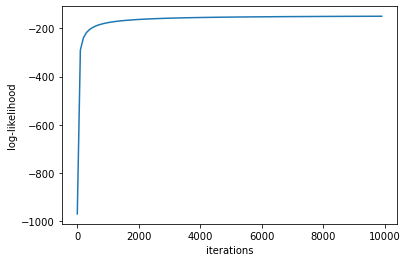

In [59]:
# Results
# Plot the log-likelihood for several iterations
iterations = np.arange(0, 10000, 100)
plt.plot(iterations, lls)
plt.xlabel('iterations')
plt.ylabel('log-likelihood')

# Percent error rate
y_pred_train = np.rint(sig(np.dot(w, x_train.transpose())))
per_train = percent_error(y_train, y_pred_train)
print('Training percent error rate:\t{}%'.format(round(per_train, 2)))

print("Final weights:")
print(np.round(w, decimals=5).reshape((8,8)))

## (b) Testing
Use the model learned in part (a) to label the images in the files test3.txt and test5.txt.
Report your percent error rate on these images.

In [55]:
# Percent error rate
x_test, y_test = data('test3.txt', 'test5.txt')
y_pred_test = np.rint(sig(np.dot(w, x_test.transpose())))
per_test = percent_error(y_test, y_pred_test)
print('Testing percent error rate:\t{}%'.format(round(per_test, 2)))

Testing percent error rate:	5.5%


In [17]:
w = np.array([-1.25936385, -1.37419156, -1.93315691, -0.94670866, -1.63594695,
       -0.47379369,  0.89570972,  1.87976697,  0.70295908,  0.06910995,
        0.79526537, -0.54738677, -0.10168444,  0.54824705, -1.40401752,
       -0.06085015,  2.68724645,  1.1307781 ,  1.05255621,  0.35054039,
        0.28218726, -2.04811778, -3.02994933, -3.45483084,  2.12096748,
        0.71620149,  1.51838805, -0.53512089, -1.43576657, -0.56020994,
        0.36817054, -0.18712274,  0.23122339,  0.27648621,  0.19446814,
       -0.8277966 , -0.22176086, -0.1368842 , -0.63159855, -0.20238899,
        1.22045228, -0.94061884,  0.51925866,  0.62392667,  0.45485562,
       -0.67526907,  0.01770258, -1.70623856,  0.42114389, -0.22439154,
        0.98362023,  0.85134271,  0.05054536, -0.26658909,  0.49027812,
       -1.49941143,  0.25258644,  0.35062984,  0.04243829,  3.70280437,
        0.54295649,  0.5529752 , -0.02858906, -0.57876249])